##**David Alejandro Vásquez Franco**

##**CC 1000921301**

<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_12_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Laboratorio:

1. Cargar load digitis
```
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[95])
plt.show()
```

2, Aplicar random foreset usando sklearn

(1797, 64)


<Figure size 640x480 with 0 Axes>

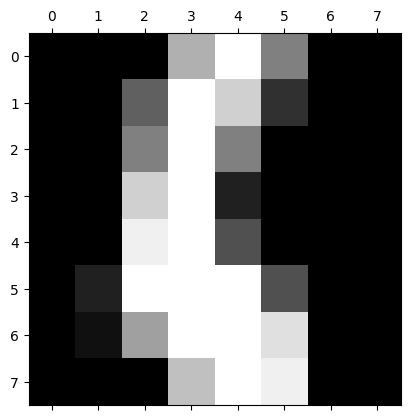

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[95])
plt.show()

In [3]:
# #write code in python  for mnist dataset  using random forset
# # GPT 3 Code
# #Solution 2
# import numpy as np
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784')
# x, y = mnist["data"], mnist["target"]
# import numpy as np
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784')
# x, y = mnist["data"], mnist["target"]


# def train_test_split(x, y, test_ratio):
#     shuffled_indices = np.random.permutation(len(x))
#     test_set_size = int(len(x) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return x[train_indices], y[train_indices], x[test_indices], y[test_indices]

# train_set, train_labels, test_set, test_labels = train_test_split(x, y, test_ratio=0.2, random_state=42)



# from sklearn.ensemble import RandomForestClassifier
# forest_clf = RandomForestClassifier(random_state=42)
# forest_clf.fit(train_set, train_labels)
# forest_clf.predict([some_digit])
# forest_clf.predict_proba([some_digit])

# from sklearn.model_selection import cross_val_score
# cross_val_score(forest_clf, train_set, train_labels, cv=3, scoring="accuracy")


# from sklearn.neighbors import KNeighborsClassifier
# knn_clf = KNeighborsClassifier()
# knn_clf.fit(train_set, train_labels)
# knn_clf.predict([some_digit])
# knn_clf.score(test_set, test_labels)

# cross_val_score(knn_clf, train_set, train_labels, cv=3, scoring="accuracy")


# from sklearn.model_selection import GridSearchCV

# param_grid = [
#     {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
#     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
#  ]
# forest_clf = RandomForestClassifier()
# grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
#                            scoring='neg_mean_squared_error', return_train_score=True)
# grid_search.fit(train_set, train_labels)


# np.sqrt(-grid_search.best_score_)


# grid_search.best_params_

# feature_importances = grid_search.best_estimator_.feature_importances_
# feature_importances
# extra_attribs = ["rooms_per_hold", "pop_per_hhold", "bedrooms_per_room"]
# cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories[0])
# attributes = num_attribs + extra_attribs + cat_one_hot_attribs
# np.argsort(feature)
# sorted(zip(feature_importances, attributes), reverse=True)

# **Solución**

## **1. Cargar load digits**

In [13]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

Dimensiones de los datos: (1797, 64)


<Figure size 640x480 with 0 Axes>

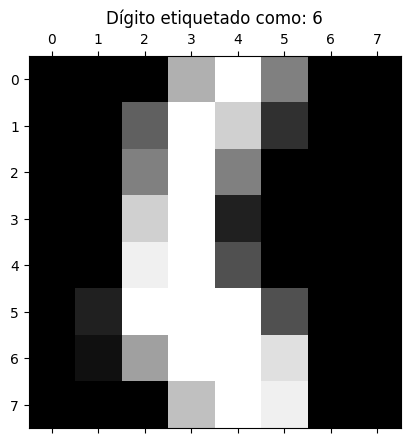

In [5]:
# Dataset
digits = load_digits()

# Dimensiones
print(f"Dimensiones de los datos: {digits.data.shape}")

# Visualizamos una imagen
plt.gray() # Configura el mapa de color a escala de grises
plt.matshow(digits.images[95]) # Muestra la matriz 8x8 como imagen
plt.title(f"Dígito etiquetado como: {digits.target[95]}")
plt.show()

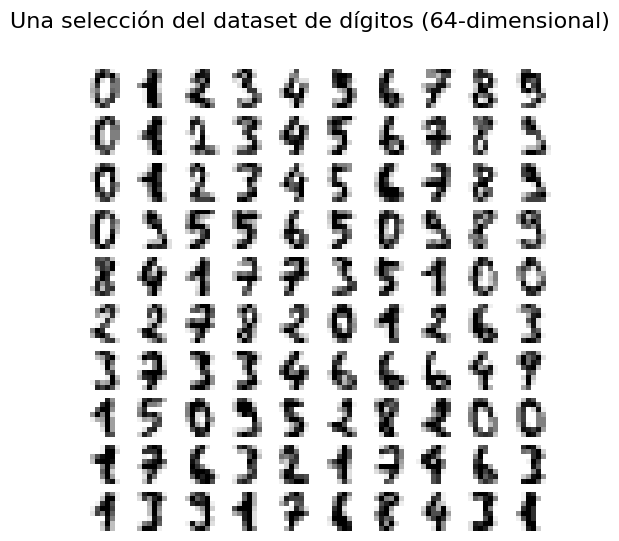

In [6]:
X = digits.data

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))

for idx, ax in enumerate(axs.ravel()):
    # reshape(8, 8) convierte la fila de 64 números en una matriz de imagen
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")

_ = fig.suptitle("Una selección del dataset de dígitos (64-dimensional)", fontsize=16)
plt.show()

## **2. Aplicar Random Forest usando sklearn.**

In [8]:
X = digits.data
y = digits.target

# test_size=0.2 (20% test) y random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {X_train.shape[0]} imágenes")
print(f"Prueba: {X_test.shape[0]} imágenes")

Entrenamiento: 1437 imágenes
Prueba: 360 imágenes


Exactitud (Accuracy) del modelo base: 97.22%

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



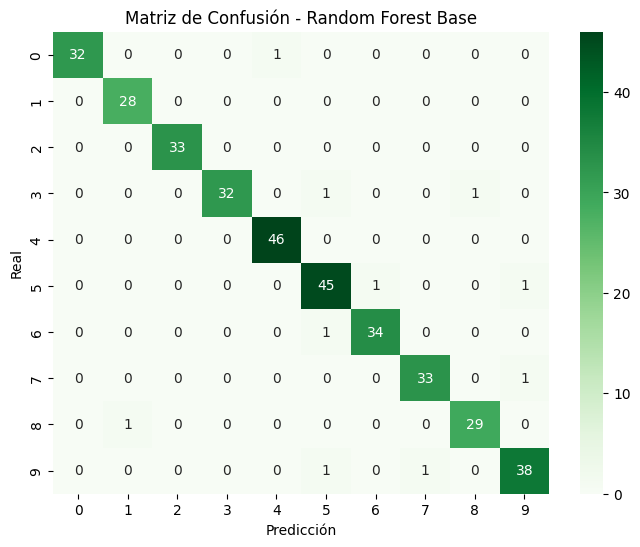

In [10]:
# n_estimators=100: Creamos un bosque con 100 árboles de decisión
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos el modelo
rf_model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = rf_model.predict(X_test)

# Evaluamos el rendimiento inicial
acc = accuracy_score(y_test, y_pred)
print(f"Exactitud (Accuracy) del modelo base: {acc*100:.2f}%\n")

print("--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))

# Graficamos la Matriz de Confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Random Forest Base")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

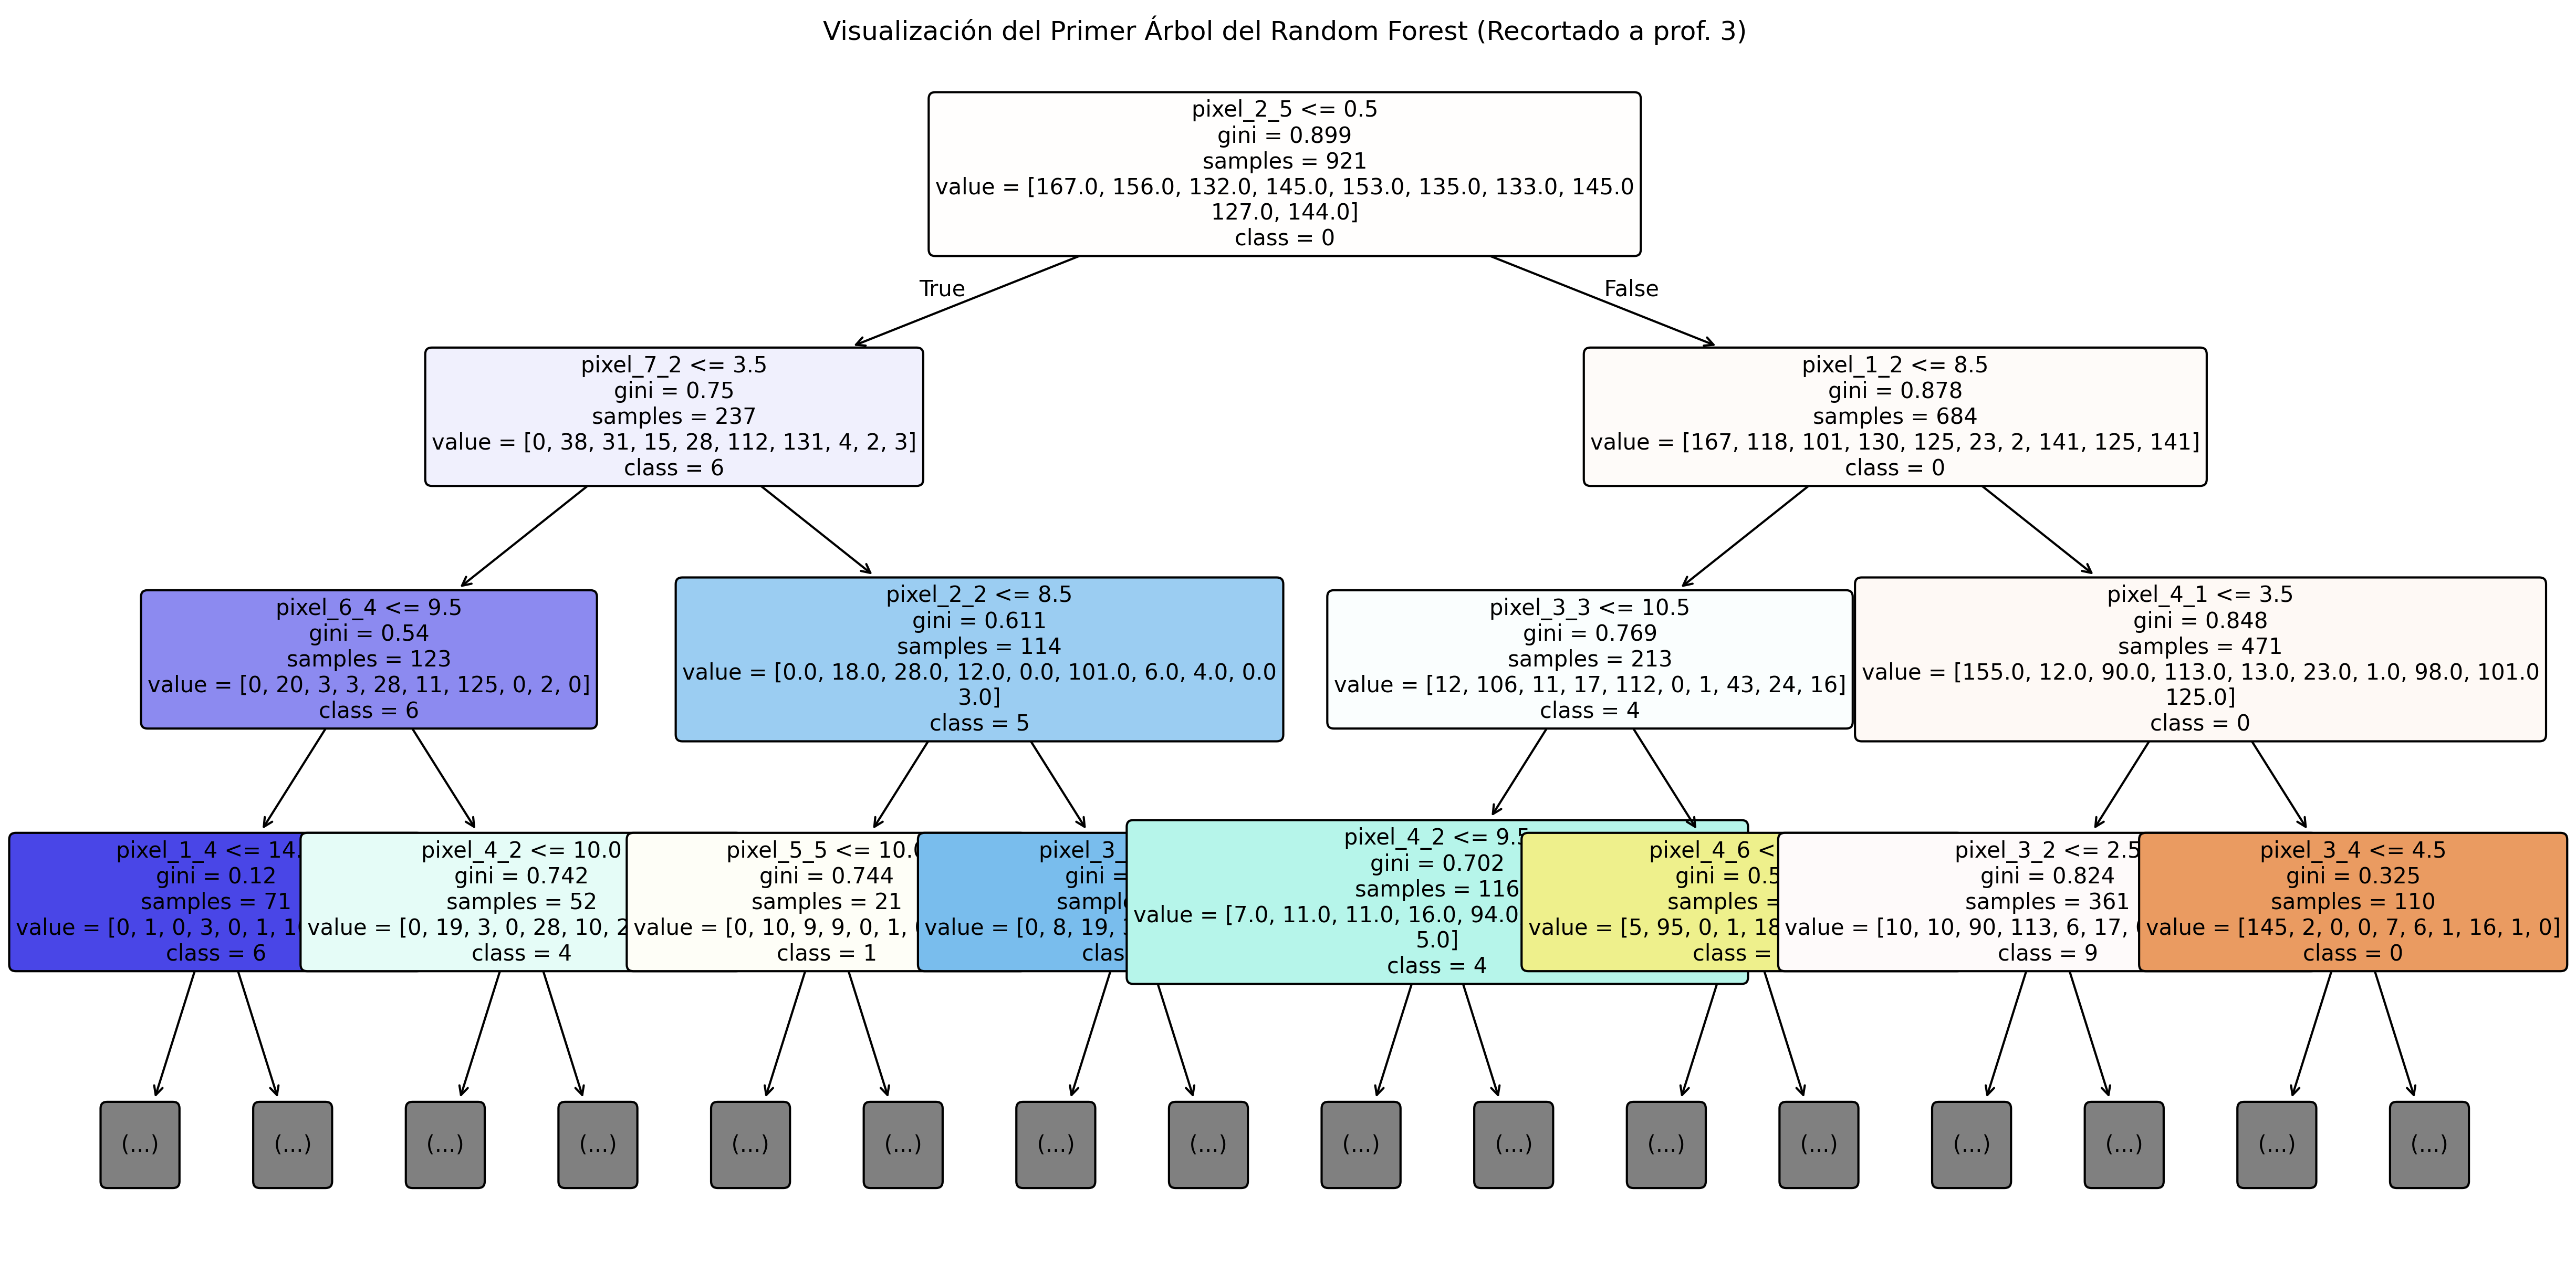

In [14]:
# rf_model.estimators_ es una lista que contiene los 100 árboles
arbol_1 = rf_model.estimators_[0]

plt.figure(figsize=(20, 10), dpi=300)

plot_tree(arbol_1,
          filled=True,
          feature_names=digits.feature_names, # Nombres de las cols (pixel_0_0, etc)
          class_names=[str(i) for i in digits.target_names], # Nombres de las clases ('0'...'9')
          rounded=True,
          max_depth=3,
          fontsize=10)

plt.title("Visualización del Primer Árbol del Random Forest (Recortado a prof. 3)")
plt.show()

In [12]:
# Validación cruzada
scores = cross_val_score(rf_model, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)

print("\nPuntajes en cada ronda:", scores)
print(f"Promedio de Exactitud: {scores.mean()*100:.2f}% (+/- {scores.std()*100:.2f}%)")


Puntajes en cada ronda: [0.96242171 0.96659708 0.98121086]
Promedio de Exactitud: 97.01% (+/- 0.81%)


Train: (59500, 784), Test: (10500, 784)


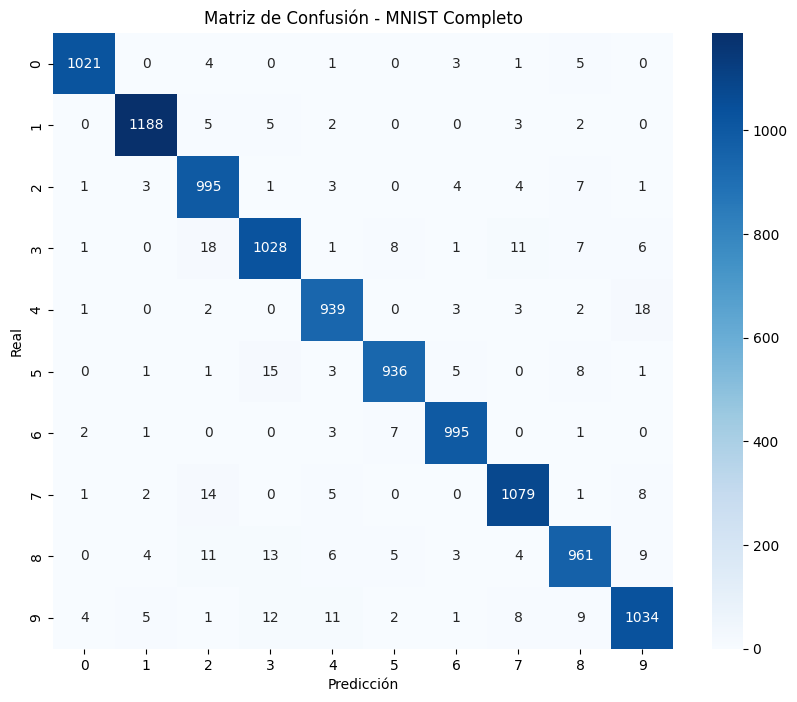

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.99      0.99      0.99      1205
           2       0.95      0.98      0.96      1019
           3       0.96      0.95      0.95      1081
           4       0.96      0.97      0.97       968
           5       0.98      0.96      0.97       970
           6       0.98      0.99      0.98      1009
           7       0.97      0.97      0.97      1110
           8       0.96      0.95      0.95      1016
           9       0.96      0.95      0.96      1087

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500



In [15]:
from sklearn.datasets import fetch_openml

# Dataset MNIST
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
X, y = mnist["data"], mnist["target"].astype(int)

# División train/test (60,000 entreno / 10,000 prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# Random Forest
modelo_mnist = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
modelo_mnist.fit(X_train, y_train)

y_pred = modelo_mnist.predict(X_test)

# Matriz de Confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - MNIST Completo")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Reporte
print(classification_report(y_test, y_pred))

In [16]:
from sklearn.model_selection import GridSearchCV

# Rejilla de parámetros a probar
param_grid = {
    'n_estimators': [100, 300],        # Probará bosques de 100 y 300 árboles
    'max_features': ['sqrt', 'log2'],  # Diferentes formas de seleccionar características
    'max_depth': [None, 20],           # Árboles infinitos vs limitados a prof. 20
}

# Búsqueda
grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,                 # Validación cruzada de 3 pliegues
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print("\nMejores parámetros encontrados:", grid.best_params_)
print("Mejor exactitud (Accuracy):", grid.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Mejores parámetros encontrados: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}
Mejor exactitud (Accuracy): 0.9682016860210677
